# DMA 22-23 marzo

### Laminato quasi simmetrico 11 strati + 1(rc 200)


| spessore | ply    | tipo           | oientamento |
|----------|--------|----------------|-------------|
| 0.26     | RC-200 | Tessuto (fine) | 0/90        |
| 0.49     | RC-400 | Tessuto        | 0/90        |
| 0.47     | XC-400 | c-ply          | -45/+45     |
| 0.33     | UC-300 | unidirezionale | 0           |
| 0.33     | UC-300 | uni            | 0           |
| 0.33     | UC-300 | uni            | 0           |
| 0.49     | RC-400 | Tessuto        | 0/90        |
| 0.33     | UC-300 | uni            | 0           |
| 0.33     | UC-300 | uni            | 0           |
| 0.33     | UC-300 | uni            | 0           |
| 0.47     | XC-400 | C-ply          | -45/45      |
| 0.49     | RC-400 | Tessuto        | 0/90        |

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from Modulo_DMA import estrai,plottaggio,media,dispersione
from Composito import get_laminate,Q_ply,get_engineering_constants,get_compliance,get_Bending_stiffness,get_concatenate_stiffness

f_min = 30
f_max = 100

# Variabili ausiliarie => nome file
name = []
name_2N = []
name_meta = []
name_2N_meta = []

for i in range(1,6):
    name.append(f"CFRP_f1_100_5_1N_{i}")
    name.append(f"CFRP_f1_100_5_1N_dietro_{i}")
    name_2N.append(f"CFRP_f1_100_5_2N_{i}")
    name_2N.append(f"CFRP_f1_100_5_2N_dietro_{i}")
    name_2N_meta.append(f"CFRP_f1_100_5_2N_{i}")
    name_meta.append(f"CFRP_f1_100_5_1N_{i}")
columns = ('Nome strato','caratteristiche')
widths = [1, 2, 2]
gs_kw = dict(width_ratios=widths)

rc_200 = {'s':0.26,'Ex':53522,'Ey':53522,'v':0.03,'G':2929,'fabric':True,'theta':0,'meta':['rc_200','tessuto (fine)']}
rc_400 = {'s':0.49,'Ex':53522,'Ey':53522,'v':0.03,'G':2929,'fabric':True,'theta':0,'meta':['rc_400','tessuto']}
xc_400 = {'s':0.47,'Ex':57770,'Ey':57770,'v':0.03,'G':3186,'fabric':True,'theta':45,'meta':['xc_400','c-ply (-45/+45)']}
uc_300 = {'s':0.33,'Ex':118454,'Ey':7104,'v':0.29,'G':3531,'fabric':False,'theta':0,'meta':['uc_300','unidirezionale']}
resina = {'s':0.10,'Ex':3.7*10**3,'Ey':3.7*10**3,'v':0.245,'G':0,'fabric':False,'theta':0,'meta':['resina','resina epossirica']}
resina['G'] = resina['Ex']/(2*(1+resina['v']))
resina['s'] = 0.1
#rc_200['s'] = rc_200['s']*6/4.8
#rc_400['s'] = rc_200['s']*6/4.8
#xc_400['s'] = rc_200['s']*6/4.8
#uc_300['s'] = rc_200['s']*6/4.8


In [2]:
normalizza = False
flag_normalizza = 's' #s'

# Provino A

spostamento di dma/provino 1a/ massimo 0.110212 [mm]
spostamento di dma/provino 3a/ massimo 0.101837 [mm]
spostamento di dma/provino 12a/ massimo 0.110282 [mm]
--------------------------------------------------------------------
* media reale 18375.054285714283
* E_f 30469.88462852788
* D_11 norm 30550.832913626924
* nome : provino 1a s_reale : 0.95, s: 1.15
* E^f_xx = 1/d_xx = : 3842.326718844163 e normalizzato E*^f_xx = 1/d*_xx = : 30481.47212650535
* D : 3880.7522687054657, Bs  3849.519585453912
* D_norm : 30619.891328653302, Bs_norm  30537.747343772087
* E : 53878.682053298675, E con s teorico: 30373.459374009664
30484.719960549028
--------------------------------------------------------------------
* media reale 24187.882142857143
* E_f 39233.98988378223
* D_11 norm 60503.18912009783
* nome : provino 3a s_reale : 2.25, s: 1.76
* E^f_xx = 1/d_xx = : 20507.808574881357 e normalizzato E*^f_xx = 1/d*_xx = : 55988.26562041853
* D : 32054.922503229198, Bs  23300.85206589319
* D_norm : 7

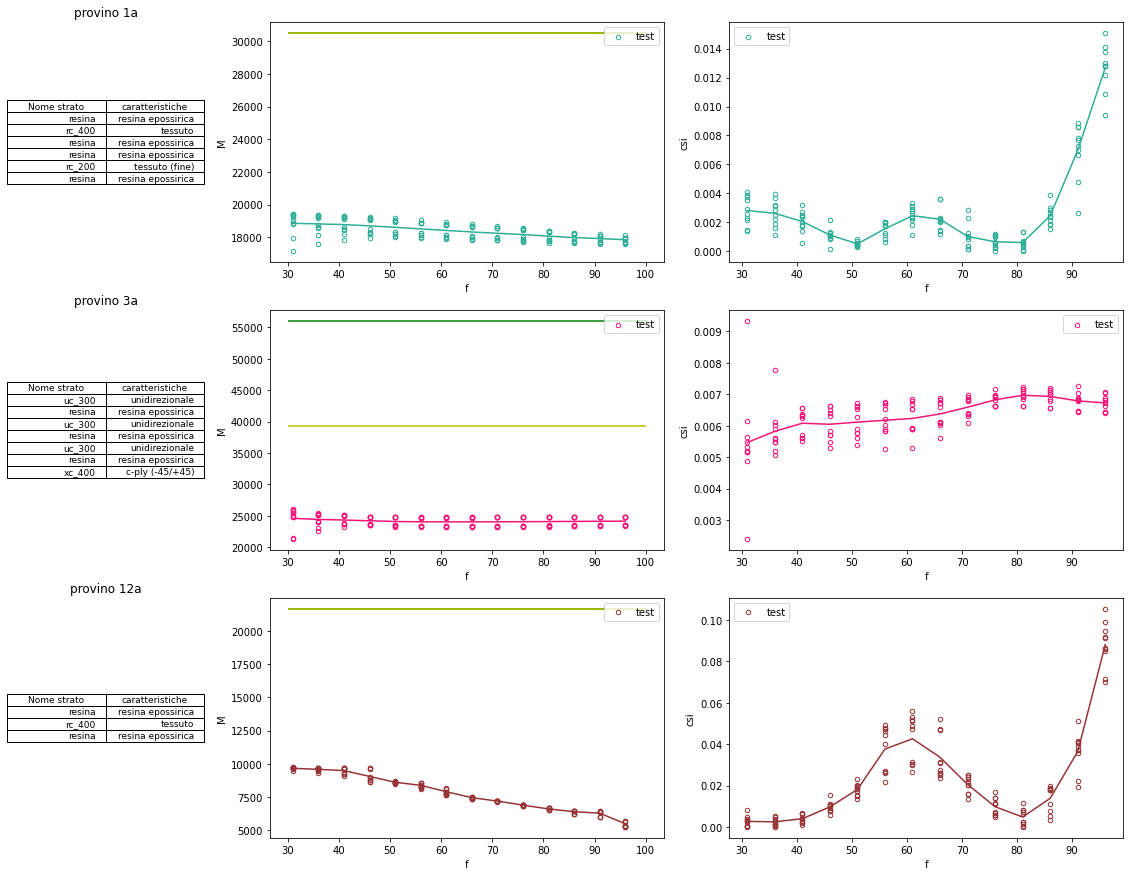

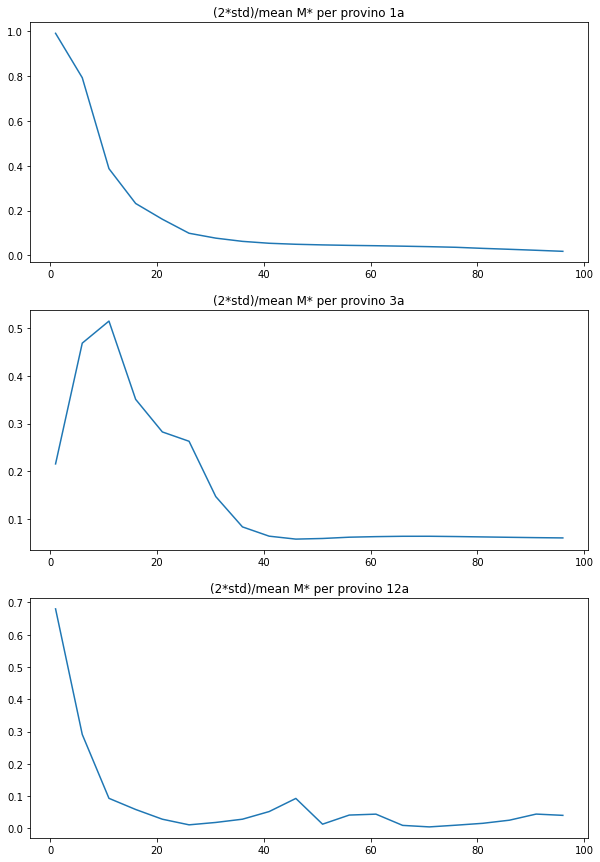

** Confonto prove provino 1A del 22/3 e quelle di febbraio
spostamento di dma/provino 1a vecchie/ massimo 0.14837799999999998 [mm]


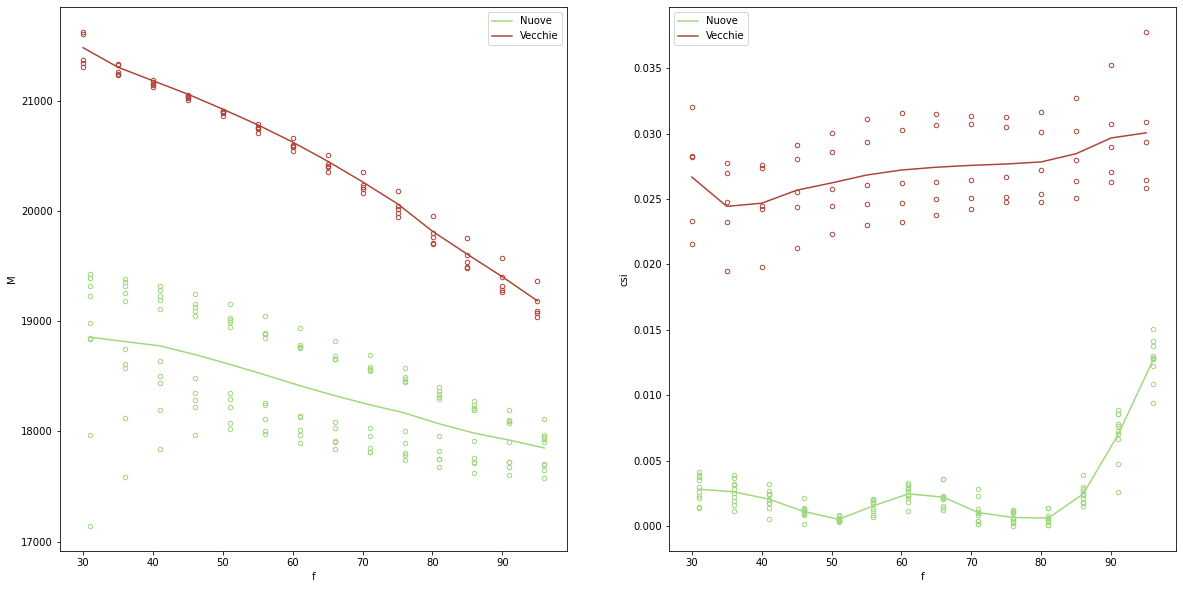

In [3]:

path_base = r'dma/provino 1a/'
laminato_provino_1a = {'name':'provino 1a','s':0.95,'w':12.41,'struttura':[resina,rc_400,resina,resina,rc_200,resina]}

data_provino_1a = estrai(path_base,1,name=name,normalizza=normalizza,s=laminato_provino_1a[flag_normalizza])

path_base = r'dma/provino 3a/'
laminato_provino_3a =  {'name':'provino 3a','s':2.25,'w':12.39,'struttura':[uc_300,resina,uc_300,resina,uc_300,resina,xc_400]}

data_provino_3a = estrai(path_base,1,name=name,normalizza=normalizza,s=laminato_provino_3a[flag_normalizza])

path_base = r'dma/provino 12a/'
laminato_provino_12a = {'name':'provino 12a','s':0.69,'w':11.98,'struttura':[resina,rc_400,resina]}

data_provino_12a = estrai(path_base,1,name=name,normalizza=normalizza,s=laminato_provino_12a[flag_normalizza])

#

lista = [data_provino_1a,data_provino_3a,data_provino_12a]
lista_meta = [laminato_provino_1a,laminato_provino_3a,laminato_provino_12a]

def ABD_beam_vinson(laminato,b):
    s = 0
    for ply in laminato: # definisco lo Spessore
        s += ply['s']
    z_0 = s/2 # Cordinata piano strato
    A = np.zeros([3,3])
    B = np.zeros([3,3])
    D = np.zeros([3,3])
    for ply in laminato:
        c2 = np.cos(ply['theta'])**2
        s2 = np.sin(ply['theta'])**2
        E_k = 1/((c2**2)/ply['Ex']+(s2**2)/ply['Ey']+(1/ply['G']-2*ply['v']/ply['Ex'])*c2*s2)
        s_k = ply['s']
        z_k = z_0 # limite superiore
        z_0 += -s_k # limite inferiore
        A += (E_k*s_k)*b
        B += (E_k*s_k*(z_k + z_0)/2)*b
        D += (E_k*((z_k)**3-(z_0)**3)/3)*b
    return A,B,D
    
def plot_combinato(lista,lista_meta,f_min = f_min,f_max = 100,y_lim = None):
    columns = ('Nome strato','caratteristiche')
    widths = [1, 2, 2]
    gs_kw = dict(width_ratios=widths)
    n = len(lista)
    if y_lim == None:
        y_lim = [None for i in range(n)]
    fig,ax = plt.subplots(n,3,figsize=(20,n*5),gridspec_kw=gs_kw)
    _,ax_disp = plt.subplots(n,1,figsize=(10,n*5))
    s = 0
    for i in range(n):
        ax[i][0].table(cellText=[ply['meta'] for ply in lista_meta[i]['struttura']],colLabels=columns,loc='center')
        ax[i][0].axis('off')
        ax[i][0].set_title(lista_meta[i]['name'])
        plottaggio(lista[i],ax[i][1],ax[i][2],f_min = f_min,flag_colore = 1)
        (A,B,D,spessore_teorico) = get_laminate(lista_meta[i]['struttura'])
        if False:
            A_norm = A/lista_meta[i]['s']
            B_norm = 2*B/(lista_meta[i]['s']**2)
            D_norm = D*12/(lista_meta[i]['s']**3)
        else:
            A_norm = A/spessore_teorico
            B_norm = 2*B/(spessore_teorico**2)
            D_norm = D*12/(spessore_teorico**3)
        
        Bs = get_Bending_stiffness(A,B,D)
        Bs_norm = get_Bending_stiffness(A_norm,B_norm,D_norm)
    
        a,b,d = get_compliance(A,B,D)
        a_norm,b_norm,d_norm = get_compliance(A_norm,B_norm,D_norm)
        d_xx = np.linalg.inv(D_norm-3*np.dot(B,np.dot(np.linalg.inv(A),B)))[0,0]
        ax[i][1].hlines(1/(d_norm[0,0]),f_min,f_max,colors='g')
        ax[i][1].hlines(1/(d_xx),f_min,f_max,colors='y')

        #ax[i][1].hlines(1/d[0,0],f_min,f_max)
        print("--------------------------------------------------------------------")
        print(f"* media reale {media(lista[i],f_min)[1]}")
        print(f"* E_f {1/d_xx}")
        print(f"* D_11 norm {1/(d_norm[0,0]-b_norm[0,0]**2/d_norm[0,0])}")

        print( f"* nome : {lista_meta[i]['name']} s_reale : {lista_meta[i]['s']}, s: {spessore_teorico}")       
        print(f"* E^f_xx = 1/d_xx = : {1/d[0,0] } e normalizzato E*^f_xx = 1/d*_xx = : {1/d_norm[0,0] }")
        print(f"* D : { D[0,0] }, Bs  { Bs[0,0] }")
        print(f"* D_norm : { D_norm[0,0] }, Bs_norm  { Bs_norm[0,0] }")
        print( f"* E : { Bs[0,0]*(12/(lista_meta[i]['s']**3)) }, E con s teorico: { Bs[0,0]*(12/(spessore_teorico**3)) }")
        A,B,D = ABD_beam_vinson(lista_meta[i]['struttura'],b=1)
        print(D[0,0]*12/(spessore_teorico**3))
        dispersione(lista[i],ax_disp[i],label = lista_meta[i]['name'])
        if y_lim[i] != None:
            ax[i][1].set_ylim([0,y_lim[i]])
    plt.show()


plot_combinato(lista,lista_meta,f_min = f_min,f_max = 100)
#
print('** Confonto prove provino 1A del 22/3 e quelle di febbraio')
path_base = r'dma/provino 1a vecchie/'
data_provino_1a_old = estrai(path_base,1,name=name_meta)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
plottaggio(data_provino_1a,ax1,ax2,f_min = f_min,flag_colore = 1)
plottaggio(data_provino_1a_old,ax1,ax2,f_min = f_min,flag_colore = 1)
ax1.legend(['Nuove','Vecchie'])
ax2.legend(['Nuove','Vecchie'])
plt.show()


## Provino B

spostamento di dma/provino 1b/ massimo 0.160304 [mm]
spostamento di dma/provino 1b/ massimo 0.10912700000000002 [mm]
spostamento di dma/provino 1-2b/ massimo 0.169031 [mm]


C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


spostamento di dma/provino 3b/ massimo 0.112324 [mm]
spostamento di dma/provino 4b/ massimo 0.00786846 [mm]
spostamento di dma/provino 4b  vecchie/ massimo 0.10643299999999999 [mm]
spostamento di dma/provino 5b/ massimo 0.29247199999999995 [mm]
--------------------------------------------------------------------
* media reale 23562.765714285717
* E_f 62656.2969708247
* D_11 norm 69346.2805254803
* nome : provino 1b s_reale : 2.42, s: 1.85
* E^f_xx = 1/d_xx = : 34331.95800775879 e normalizzato E*^f_xx = 1/d*_xx = : 67812.74329455075
* D : 36743.46296472835, Bs  34576.619024290725
* D_norm : 69637.9769137844, Bs_norm  68269.07465539883
* E : 29276.40004292039, E con s teorico: 65531.270138627704
67892.07704085829
--------------------------------------------------------------------
* media reale 48045.79047619047
* E_f 118454.00000000003
* D_11 norm 118454.00000000003
* nome : provino 1/2b s_reale : 1.19, s: 0.99
* E^f_xx = 1/d_xx = : 9577.983145500002 e normalizzato E*^f_xx = 1/d*_xx = :

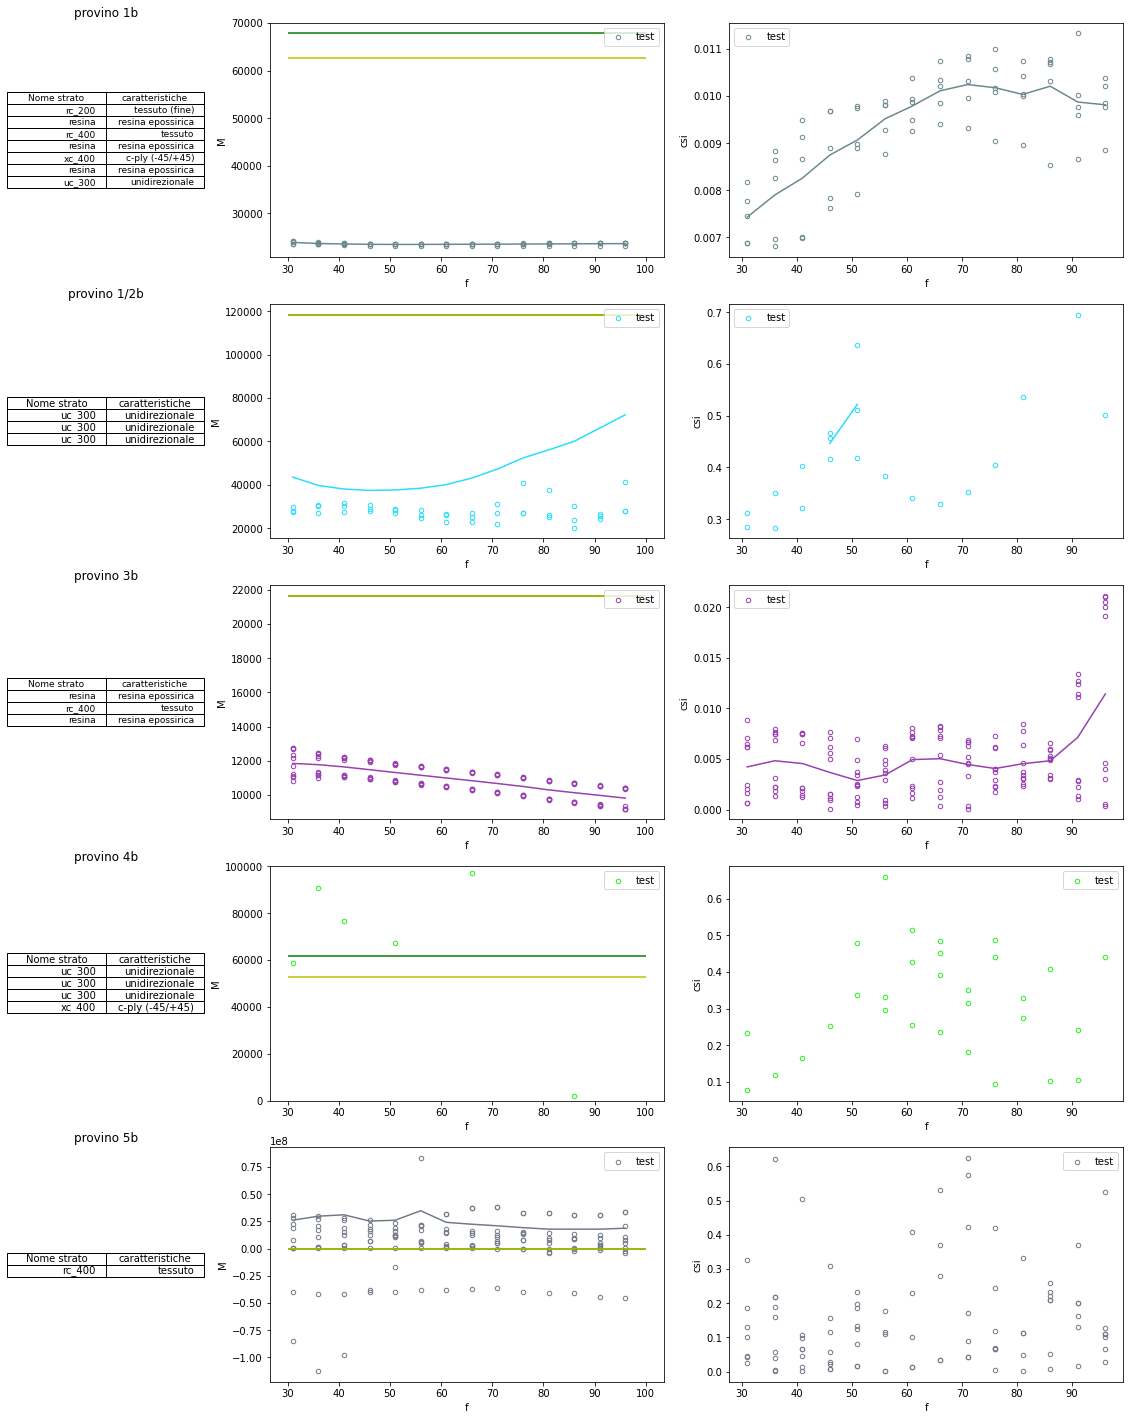

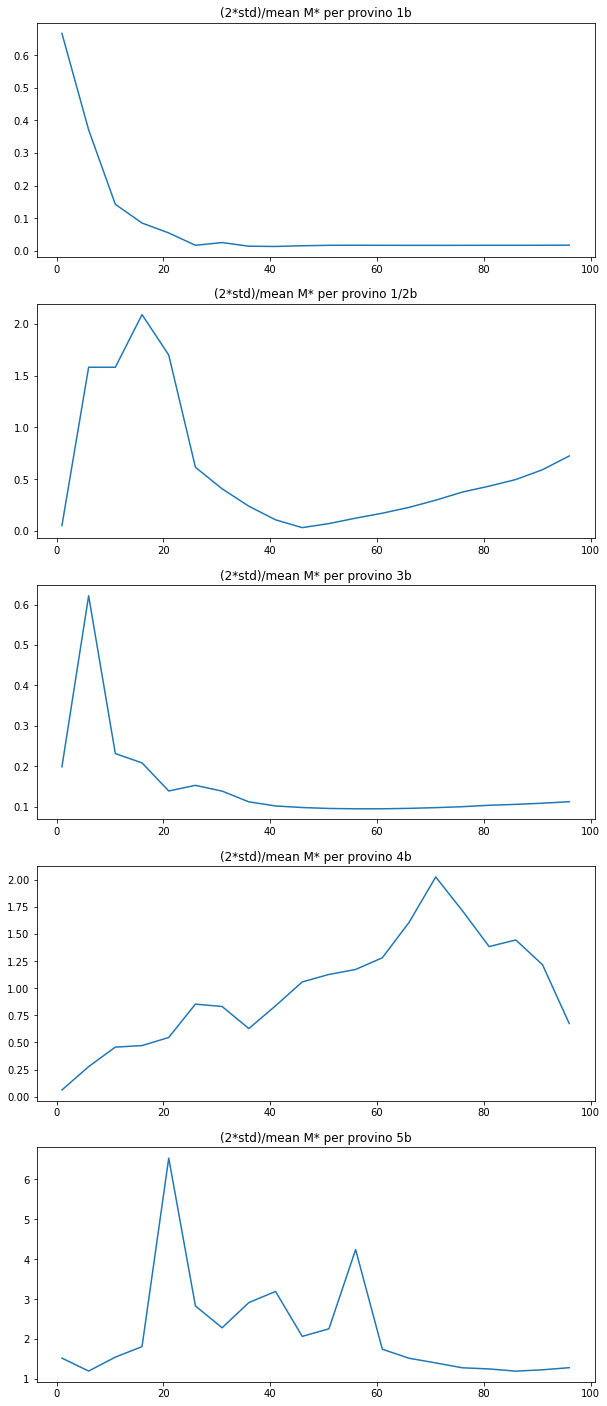

*Confronto 3b vecchio e nuovo


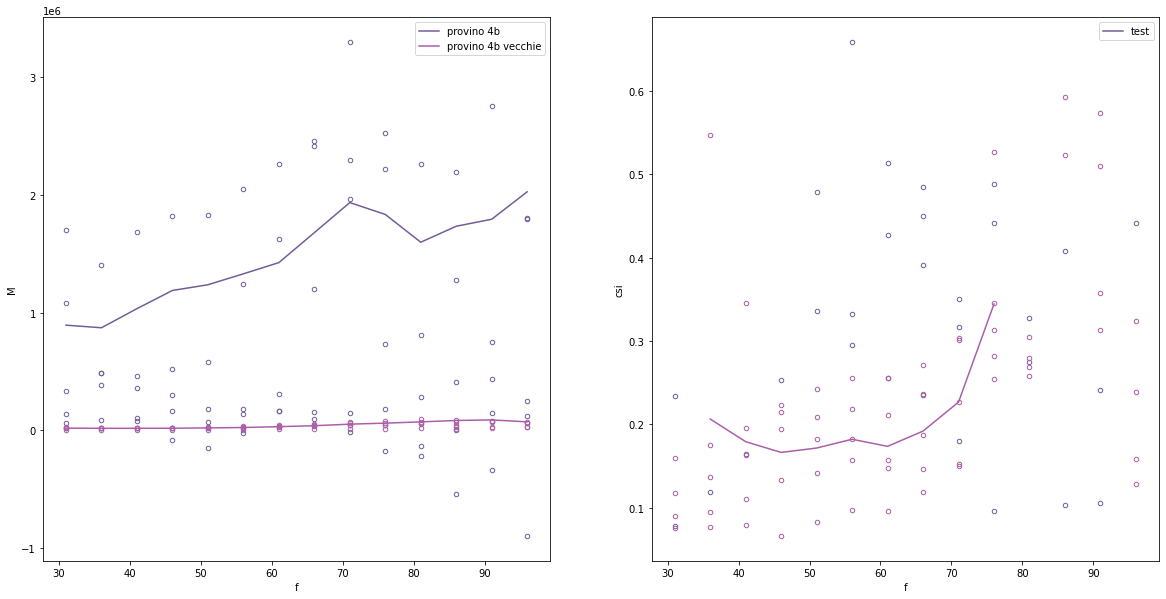

In [4]:

#
path_base = r'dma/provino 1b/'
data_provino_1b = estrai(path_base,1,name=name_meta)
data_provino_1b_2N = estrai(path_base,1,name=name_2N)

laminato_provino_1b = {'name':'provino 1b','s':2.42,'w':12.53,'struttura':[rc_200,resina,rc_400,resina,xc_400,resina,uc_300]}
,
path_base = r'dma/provino 1-2b/'
name_temp = []
name_temp = name_meta[:]
name_temp.remove('CFRP_f1_100_5_1N_1')
name_temp.remove('CFRP_f1_100_5_1N_5')
laminato_provino_1_2b = {'name':'provino 1/2b','s':1.19,'w':6.95,'struttura':[uc_300,uc_300,uc_300]}

data_provino_1_2b = estrai(path_base,1,name=name_temp,normalizza=normalizza,s=laminato_provino_1_2b[flag_normalizza])

path_base = r'dma/provino 3b/'
laminato_provino_3b = {'name':'provino 3b','s':0.66,'w':12.12,'struttura':[resina,rc_400,resina]}

data_provino_3b = estrai(path_base,1,name=name,normalizza=normalizza,s=laminato_provino_3b[flag_normalizza])

path_base = r'dma/provino 4b/'
laminato_provino_4b = {'name':'provino 4b','s':2.21,'w':12.3,'struttura':[uc_300,uc_300,uc_300,xc_400]}

data_provino_4b = estrai(path_base,1,name=name_meta,normalizza=normalizza,s=laminato_provino_4b[flag_normalizza])

path_base = r'dma/provino 4b  vecchie/'
laminato_provino_5b = {'name':'provino 5b','s':0.76,'w':12.61,'struttura':[rc_400]}

data_provino_4b_old = estrai(path_base,1,name=name_2N_meta,normalizza=normalizza,s=laminato_provino_5b[flag_normalizza])
path_base = r'dma/provino 5b/'
data_provino_5b = estrai(path_base,1,name=name,normalizza=normalizza,s=laminato_provino_5b[flag_normalizza])

## ---------------------------------------------------------------------
lista = [data_provino_1b,data_provino_1_2b,data_provino_3b,data_provino_4b,data_provino_5b]
lista_meta = [laminato_provino_1b,laminato_provino_1_2b,laminato_provino_3b,laminato_provino_4b,laminato_provino_5b]
y_lim = [None,None,None,0.1*10**6,None]#0.8*10**8]
plot_combinato(lista,lista_meta,f_min = f_min,f_max = 100,y_lim=y_lim)

  
print("*Confronto 3b vecchio e nuovo")
fig,ax = plt.subplots(1,2,figsize=(20,10))
plottaggio(data_provino_4b,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_4b_old,ax[0],ax[1],f_min = f_min,flag_colore = 1)
ax[0].legend(['provino 4b','provino 4b vecchie'])

# Provino C

spostamento di dma/provino 2c/ massimo 0.106462 [mm]
spostamento di dma/provino 3c/ massimo 0.07626229999999999 [mm]
spostamento di dma/provino 4c/ massimo 0.13662100000000002 [mm]
--------------------------------------------------------------------
* media reale 37966.56999999999
* E_f 58461.16705363268
* D_11 norm 59188.70494085584
* nome : provino 2c s_reale : 1.53, s: 1.4900000000000002
* E^f_xx = 1/d_xx = : 16068.683255804233 e normalizzato E*^f_xx = 1/d*_xx = : 58946.231868667375
* D : 16452.585719316747, Bs  16181.133373589893
* D_norm : 59683.81877465489, Bs_norm  59355.57629482602
* E : 54214.554226554035, E con s teorico: 58699.0913351683
59271.175047136436
--------------------------------------------------------------------
* media reale 14208.794285714286
* E_f 72836.92735845949
* D_11 norm 79520.10860872212
* nome : provino 3c s_reale : 1.78, s: 1.78
* E^f_xx = 1/d_xx = : 35167.404858692746 e normalizzato E*^f_xx = 1/d*_xx = : 78004.29529093808
* D : 37455.13799140223, Bs 

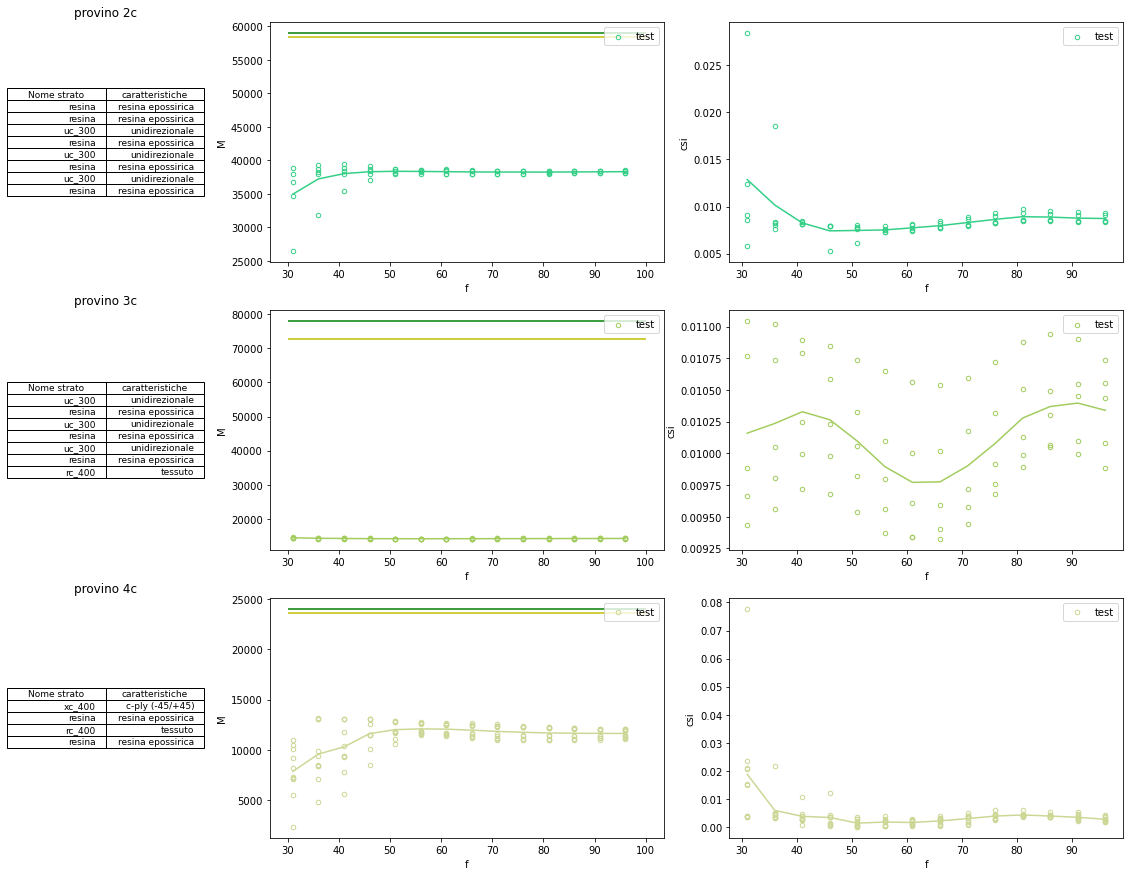

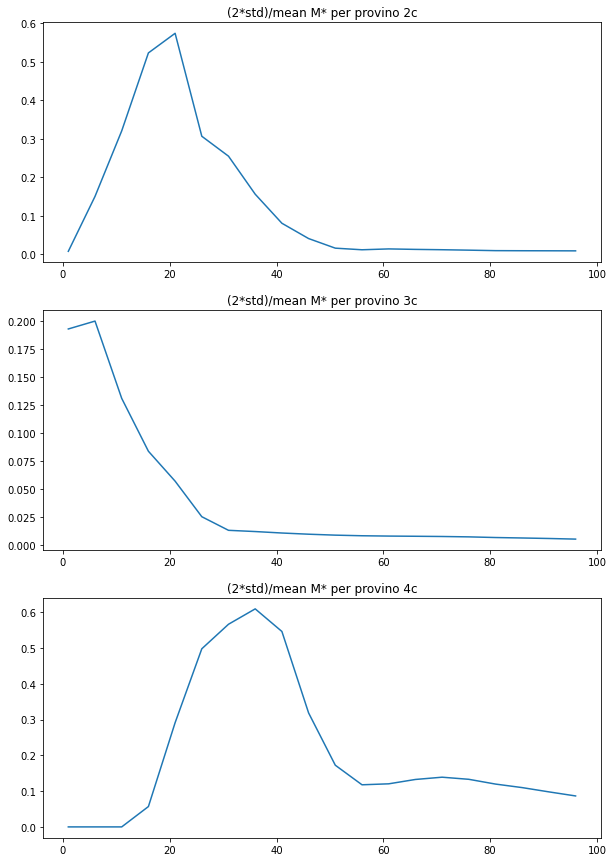

In [11]:
path_base = r'dma/provino 2c/'
laminato_provino_2c = {'name':'provino 2c','s':1.53,'w':3.13,'struttura':[resina,resina,uc_300,resina,uc_300,resina,uc_300,resina]}

data_provino_2c = estrai(path_base,1,name=name_meta,normalizza=normalizza,s=laminato_provino_2c[flag_normalizza])

path_base = r'dma/provino 3c/'
laminato_provino_3c = {'name':'provino 3c','s':1.78,'w':11.66,'struttura':[uc_300,resina,uc_300,resina,uc_300,resina,rc_400]} # [resina,resina,uc_300,resina,resina,uc_300,resina,resina,uc_300,resina,resina]

data_provino_3c = estrai(path_base,1,name=name_meta,normalizza=normalizza,s=laminato_provino_3c[flag_normalizza])

uc_300_meta = {'s':0.33*0.6,'Ex':118454,'Ey':7104,'v':0.29,'G':3531,'fabric':False,'theta':0,'meta':['uc_300','frazione unidirezionale']}

xc_400_meta = {'s':0.47,'Ex':57770,'Ey':57770,'v':0.03,'G':3186,'fabric':True,'theta':45,'meta':['xc_400',' c-ply (-45/+45)']}

path_base = r'dma/provino 4c/'
laminato_provino_4c = {'name':'provino 4c','s':0.94,'w':11.46,'struttura':[xc_400,resina,rc_400,resina]}

data_provino_4c = estrai(path_base,1,name=name,normalizza=normalizza,s=laminato_provino_4c[flag_normalizza])



## ---------------------------------------------------------------------
lista = [data_provino_2c,data_provino_3c,data_provino_4c]
lista_meta = [laminato_provino_2c,laminato_provino_3c,laminato_provino_4c]
plot_combinato(lista,lista_meta,f_min = f_min,f_max = 100)

# Combinato

## Fibre (uc 300)

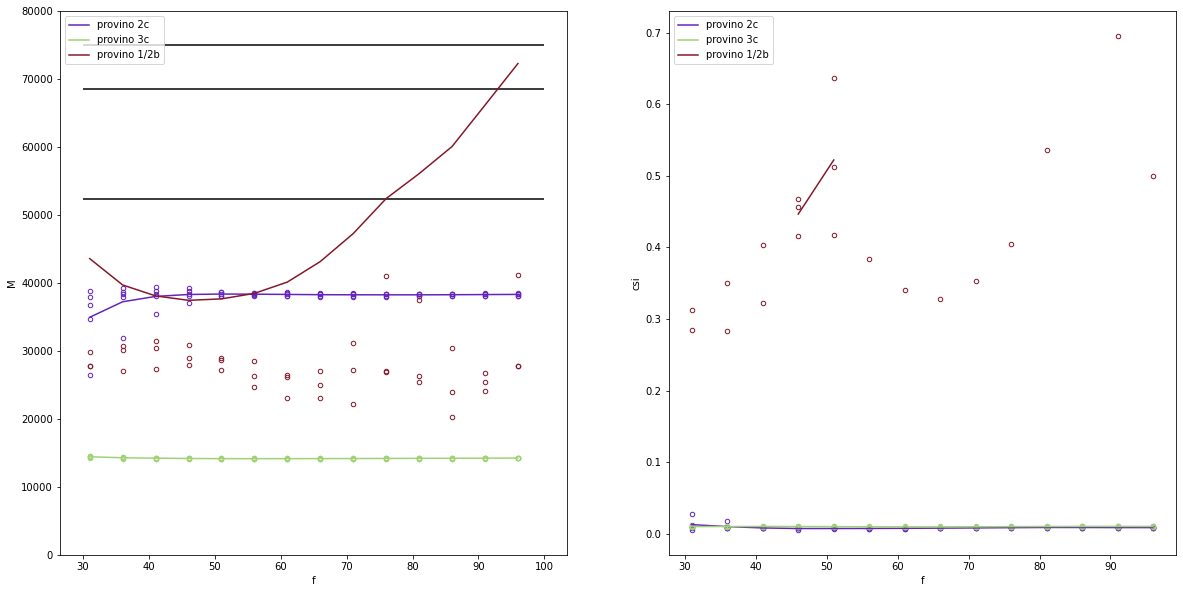

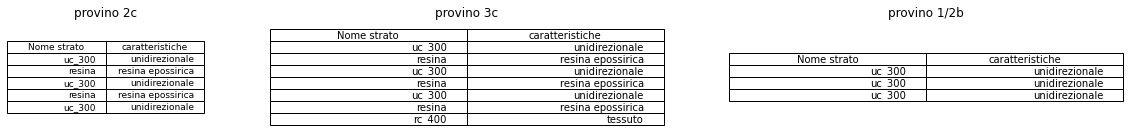

In [6]:
fig,ax = plt.subplots(1,2,figsize=(20,10))

plottaggio(data_provino_2c,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_3c,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_1_2b,ax[0],ax[1],f_min = f_min,flag_colore = 1)
lista_meta = [laminato_provino_2c,laminato_provino_3c,laminato_provino_1_2b]
for i in range(3):
    (A,B,D,_) = get_laminate(lista_meta[i]['struttura'])
    Bs = get_Bending_stiffness(A,B,D)
    ax[0].hlines(Bs[0,0]*(12/(lista_meta[i]['s']**3)),f_min,f_max)
ax[1].legend(['provino 2c','provino 3c','provino 1/2b'])
ax[0].legend(['provino 2c','provino 3c','provino 1/2b'])
ax[0].set_ylim([0,80000])
plt.show()

fig,ax = plt.subplots(1,3,figsize=(20,2),gridspec_kw=gs_kw)
columns = ('Nome strato','caratteristiche')
ax[0].table(cellText=[ply['meta'] for ply in laminato_provino_2c['struttura']],colLabels=columns,loc='center')
ax[0].axis('off')
ax[0].set_title('provino 2c')
ax[1].table(cellText=[ply['meta'] for ply in laminato_provino_3c['struttura']],colLabels=columns,loc='center')
ax[1].axis('off')
ax[1].set_title('provino 3c')
ax[2].table(cellText=[ply['meta'] for ply in laminato_provino_1_2b['struttura']],colLabels=columns,loc='center')
ax[2].axis('off')
ax[2].set_title('provino 1/2b')
plt.show()

## Tessuto RC 400

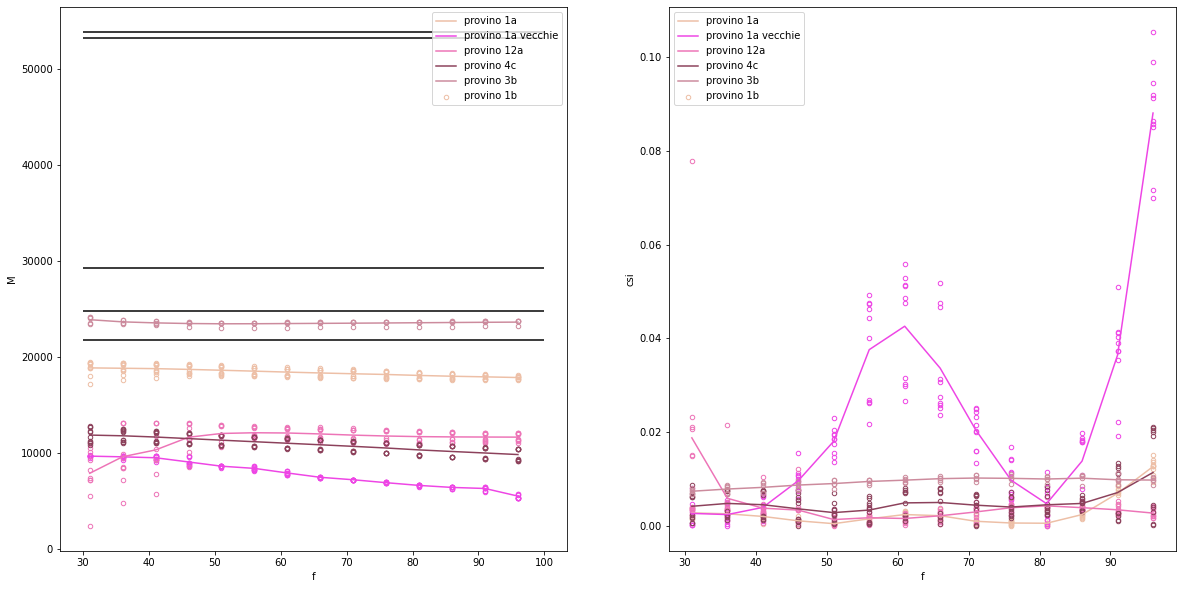

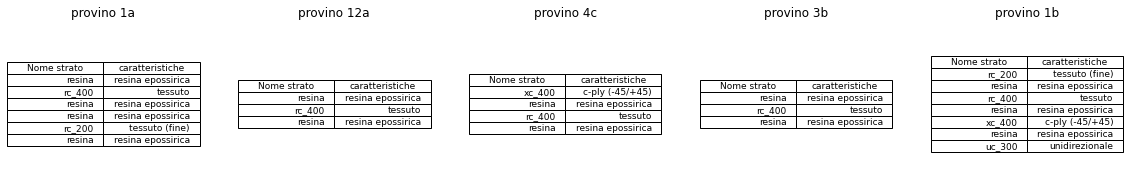

In [7]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
plottaggio(data_provino_1a,ax[0],ax[1],f_min = f_min,flag_colore = 1)
#plottaggio(data_provino_1a_old,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_12a,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_4c,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_3b,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_1b,ax[0],ax[1],f_min = f_min,flag_colore = 1)

lista_meta = [laminato_provino_1a,laminato_provino_12a,laminato_provino_4c,laminato_provino_3b,laminato_provino_1b]
for stima in lista_meta:
    (A,B,D,_) = get_laminate(stima['struttura'])
    Bs = get_Bending_stiffness(A,B,D)
    ax[0].hlines(Bs[0,0]*(12/(stima['s']**3)),f_min,f_max)

ax[1].legend(['provino 1a','provino 1a vecchie','provino 12a','provino 4c','provino 3b','provino 1b'])
ax[0].legend(['provino 1a','provino 1a vecchie','provino 12a','provino 4c','provino 3b','provino 1b'])
plt.show()

fig,ax = plt.subplots(1,5,figsize=(20,3))

ax[0].table(cellText=[ply['meta'] for ply in laminato_provino_1a['struttura']],colLabels=columns,loc='center')
ax[0].axis('off')
ax[0].set_title('provino 1a')
ax[1].table(cellText=[ply['meta'] for ply in laminato_provino_12a['struttura']],colLabels=columns,loc='center')
ax[1].axis('off')
ax[1].set_title('provino 12a')
ax[2].table(cellText=[ply['meta'] for ply in laminato_provino_4c['struttura']],colLabels=columns,loc='center')
ax[2].axis('off')
ax[2].set_title('provino 4c')
ax[3].table(cellText=[ply['meta'] for ply in laminato_provino_3b['struttura']],colLabels=columns,loc='center')
ax[3].axis('off')
ax[3].set_title('provino 3b')
ax[4].table(cellText=[ply['meta'] for ply in laminato_provino_1b['struttura']],colLabels=columns,loc='center')
ax[4].axis('off')
ax[4].set_title('provino 1b')
plt.show()

# Insieme

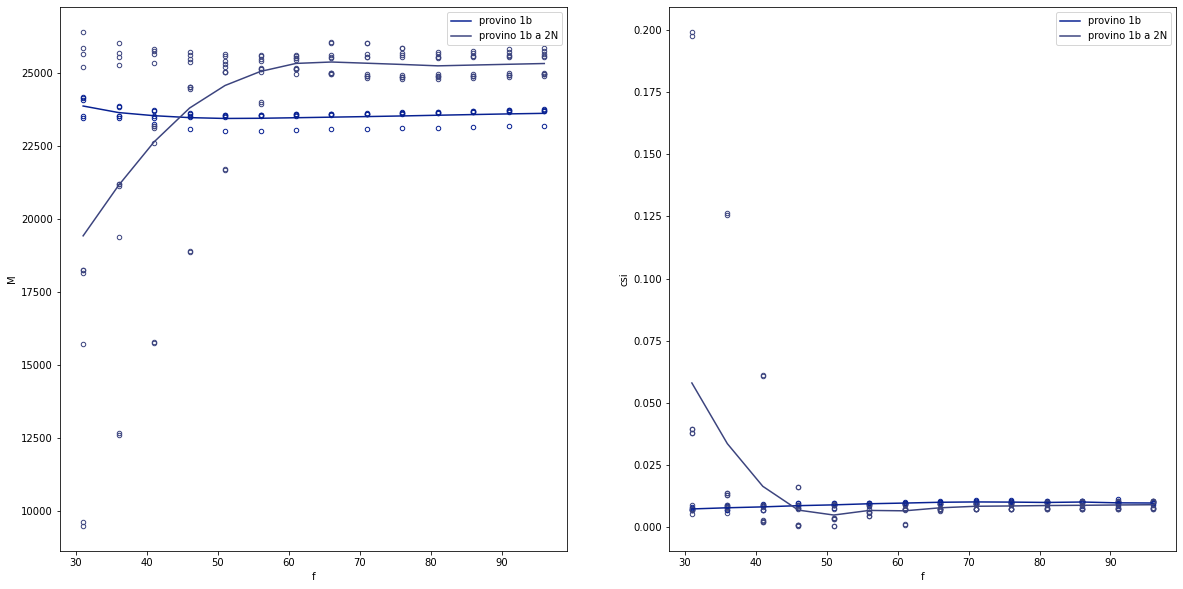

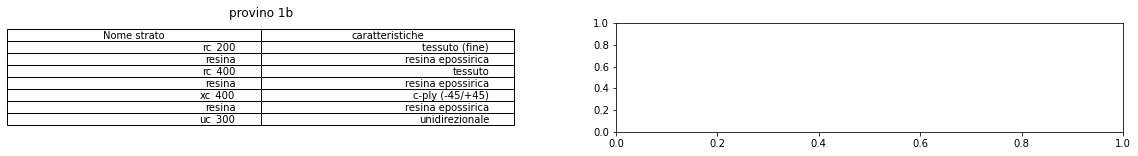

In [8]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
plottaggio(data_provino_1b,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_1b_2N,ax[0],ax[1],f_min = f_min,flag_colore = 1)

ax[1].legend(['provino 1b','provino 1b a 2N'])
ax[0].legend(['provino 1b','provino 1b a 2N'])
plt.show()

fig,ax = plt.subplots(1,2,figsize=(20,2))

ax[0].table(cellText=[ply['meta'] for ply in laminato_provino_1b['struttura']],colLabels=columns,loc='center')
ax[0].axis('off')
ax[0].set_title('provino 1b')
plt.show()


--------------------------------------------------------------------
* media reale 23562.765714285717
* E_f 62656.2969708247
* D_11 norm 69346.2805254803
* nome : provino 1b s_reale : 2.42, s: 1.85
* E^f_xx = 1/d_xx = : 34331.95800775879 e normalizzato E*^f_xx = 1/d*_xx = : 67812.74329455075
* D : 36743.46296472835, Bs  34576.619024290725
* D_norm : 69637.9769137844, Bs_norm  68269.07465539883
* E : 29276.40004292039, E con s teorico: 65531.270138627704
67892.07704085829
--------------------------------------------------------------------
* media reale 37966.56999999999
* E_f 110763.65694413238
* D_11 norm 110763.65694413238
* nome : provino 2c s_reale : 1.53, s: 1.19
* E^f_xx = 1/d_xx = : 15554.531114359763 e normalizzato E*^f_xx = 1/d*_xx = : 110763.65694413238
* D : 15635.355878493072, Bs  15635.355878493072
* D_norm : 111339.20926269681, Bs_norm  111339.20926269681
* E : 52385.93796585048, E con s teorico: 111339.2092626968
110763.14307789356
---------------------------------------

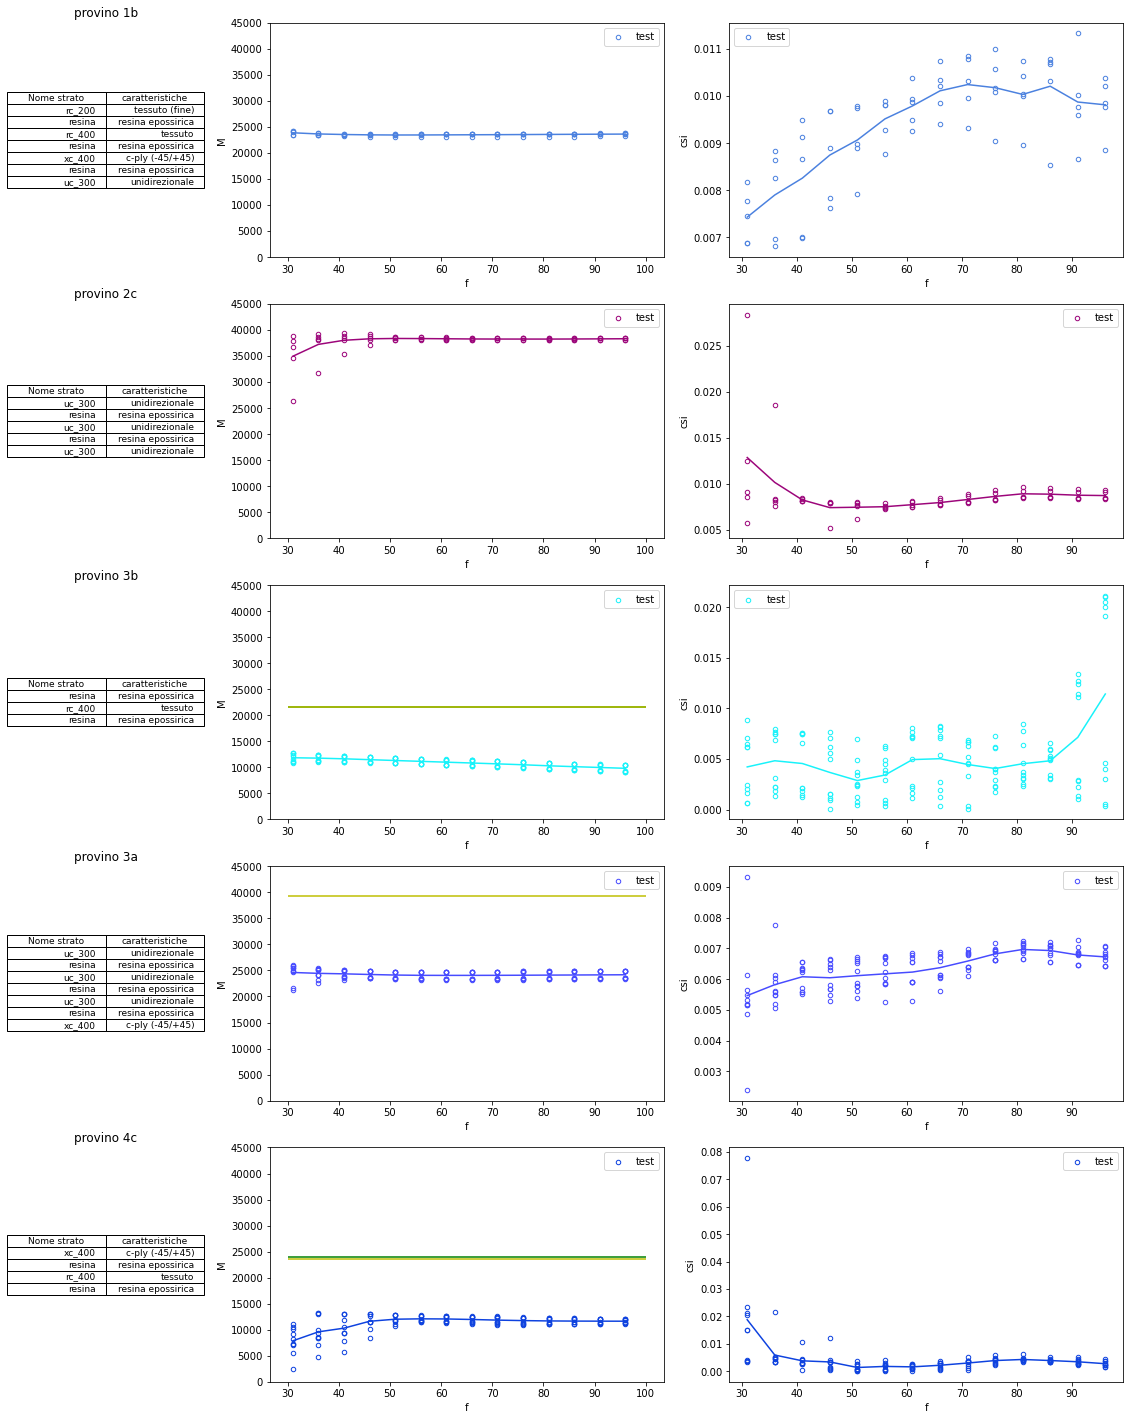

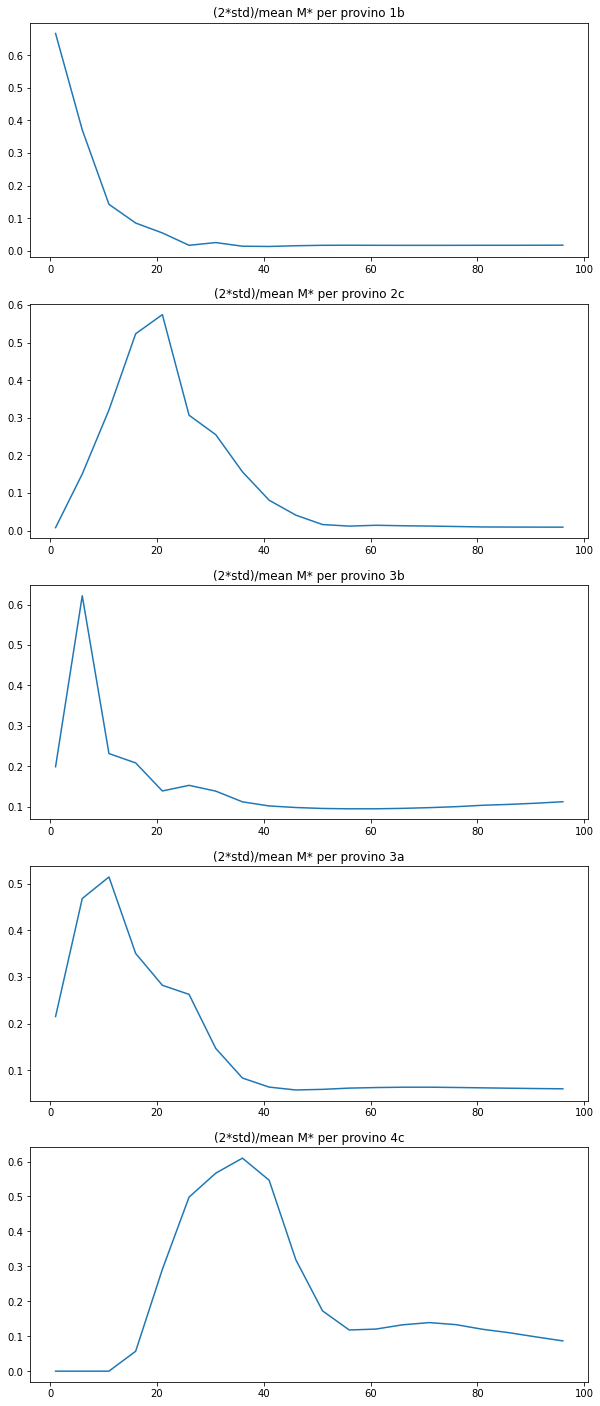

In [9]:
lista = [data_provino_1b,data_provino_2c,data_provino_3b,data_provino_3a,data_provino_4c]
lista_meta = [laminato_provino_1b,laminato_provino_2c,laminato_provino_3b,laminato_provino_3a,laminato_provino_4c]
y_lim = [45000,45000,45000,45000,45000]

plot_combinato(lista,lista_meta,f_min = f_min,f_max = 100,y_lim=y_lim)

  